In [50]:
import numpy as np
import matplotlib.pyplot as plt
dossier_resultats = r"C:\Users\loicl\Bureau\3A_ENSEEIHT\BEI\16_12_2024_structure_code\resultats_16_12_2024"
# Paramètres de l'aile
# Paramètres de l'aile
x_c, y_c = 5, 5  # Centre de l'aile dans le plan (10x10)
a, b = 5, 3   # Demi-axes de l'ellipse
P_0 = 200         # Pression maximale

# Perturbation de pression
epsilon = 10      # Amplitude de la perturbation
k = 2 * np.pi / 10 # Fréquence de la perturbation

# Création du maillage 2D
x = np.linspace(0, 10, 200)
y = np.linspace(0, 10, 200)
xv, yv = np.meshgrid(x, y)

# Calcul du champ de pression
pressure = P_0 * np.exp(-(((xv - x_c)**2) / a**2 + ((yv - y_c)**2) / b**2)) \
           + epsilon * np.sin(k * yv)

C:\Users\loicl\AppData\Local\Temp\ipykernel_39828\614095812.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


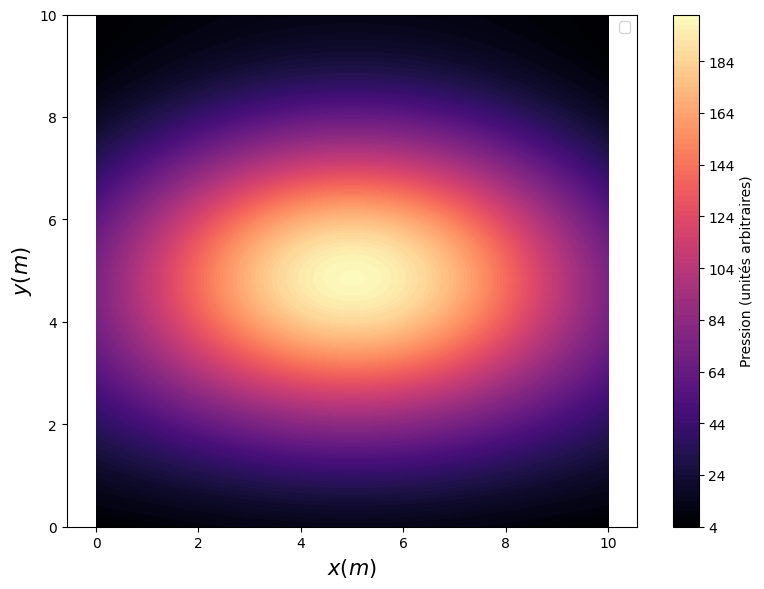

In [51]:
# Tracé du champ de pression et des points
plt.figure(figsize=(8, 6))
c = plt.contourf(xv, yv, pressure, levels=100, cmap="magma")
plt.colorbar(c, label="Pression (unités arbitraires)")
plt.xlabel("$x (m)$", size=15)
plt.ylabel("$y (m)$", size=15)
plt.legend()
plt.axis("equal")
plt.tight_layout()
plt.savefig(dossier_resultats + r"\champ_de_pression.png")
plt.show()


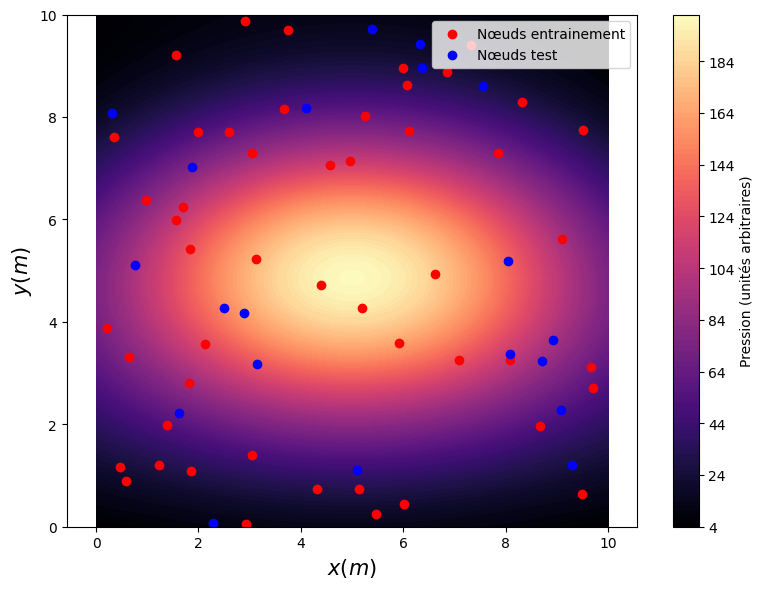

In [52]:
# Génération de points non structurés pour les nœuds du graphe
np.random.seed(42)  # Pour des résultats reproductibles

# entraînement
num_points_train = 50     # Nombre de points
nodes_x_train = np.random.uniform(0, 10, num_points_train)
nodes_y_train = np.random.uniform(0, 10, num_points_train)

# Test
num_points_test = 20
nodes_x_test = np.random.uniform(0, 10, num_points_test)
nodes_y_test = np.random.uniform(0, 10, num_points_test)

# Tracé du champ de pression et des points
plt.figure(figsize=(8, 6))
c = plt.contourf(xv, yv, pressure, levels=100, cmap="magma")
plt.colorbar(c, label="Pression (unités arbitraires)")
plt.scatter(nodes_x_train, nodes_y_train, color="red", label="Nœuds entrainement")
plt.scatter(nodes_x_test, nodes_y_test, color="blue", label="Nœuds test")
plt.xlabel("$x (m)$", size=15)
plt.ylabel("$y (m)$", size=15)
plt.legend()
plt.axis("equal")
plt.tight_layout()
plt.savefig(dossier_resultats + r"\champ_de_pression_et_noeuds.png")
plt.show()


In [53]:
import networkx as nx
from scipy.spatial import Delaunay

In [54]:
# ------------------Création du graphe entrainement------------------
G_train = nx.Graph()

# Ajout des nœuds avec la pression comme attribut
for i in range(num_points_train):
    pressure_value = P_0 * np.exp(-(((nodes_x_train[i] - x_c)**2) / a**2 + ((nodes_y_train[i] - y_c)**2) / b**2)) \
                     + epsilon * np.sin(k * nodes_y_train[i])
    G_train.add_node(i, pos=(nodes_x_train[i], nodes_y_train[i]), pressure=pressure_value)

# Ajout des arêtes (liens) entre les nœuds
points_train = np.vstack((nodes_x_train, nodes_y_train)).T
tri = Delaunay(points_train)

for simplex in tri.simplices:
    for i in range(3):
        for j in range(i + 1, 3):
            G_train.add_edge(simplex[i], simplex[j])

In [55]:
# ------------------Création du graphe test------------------
G_test = nx.Graph()

# Ajout des nœuds avec la pression comme attribut
for i in range(num_points_test):
    pressure_value = P_0 * np.exp(-(((nodes_x_test[i] - x_c)**2) / a**2 + ((nodes_y_test[i] - y_c)**2) / b**2)) \
                     + epsilon * np.sin(k * nodes_y_test[i])
    G_test.add_node(i, pos=(nodes_x_test[i], nodes_y_test[i]), pressure=pressure_value)
    
# Ajout des arêtes (liens) entre les nœuds
points_test = np.vstack((nodes_x_test, nodes_y_test)).T
tri = Delaunay(points_test)

for simplex in tri.simplices:
    for i in range(3):
        for j in range(i + 1, 3):
            G_test.add_edge(simplex[i], simplex[j])

C:\Users\loicl\AppData\Local\Temp\ipykernel_39828\318691871.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


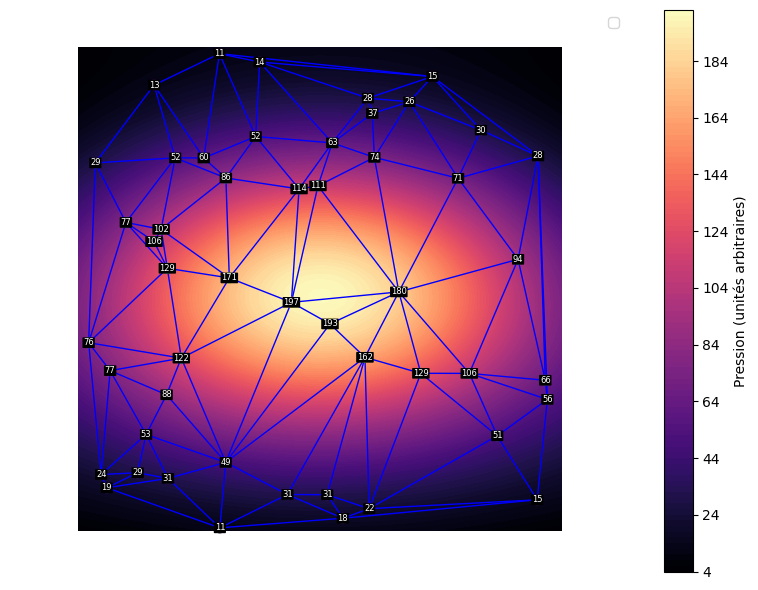

C:\Users\loicl\AppData\Local\Temp\ipykernel_39828\318691871.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


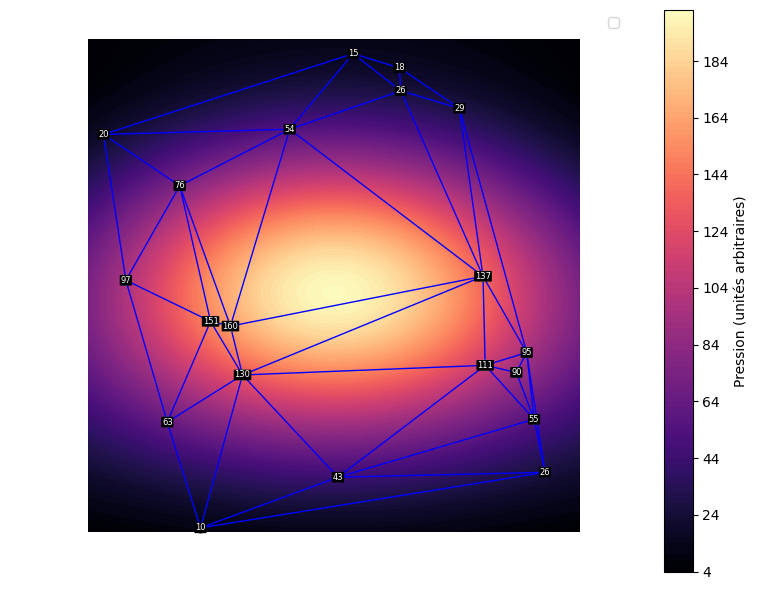

In [56]:
# ---------------Tracé du champ de pression et du graphe : train
plt.figure(figsize=(8, 6))
c = plt.contourf(xv, yv, pressure, levels=100, cmap="magma")
plt.colorbar(c, label="Pression (unités arbitraires)")

# Tracé du graphe par-dessus le champ de pression
pos_train = {i: (nodes_x_train[i], nodes_y_train[i]) for i in range(num_points_train)}
pressure_values_train = [G_train.nodes[i]['pressure'] for i in G_train.nodes]
nx.draw(G_train, pos_train, with_labels=False, node_color=pressure_values_train, cmap=plt.cm.viridis, edge_color='blue', node_size=50)

# Affichage des valeurs de pression sur les nœuds
pressure_labels_train = {i: f"{G_train.nodes[i]['pressure']:.0f}" for i in G_train.nodes}
nx.draw_networkx_labels(G_train, pos_train, labels=pressure_labels_train,
                        font_size=6, font_color='white', 
                        bbox=dict(facecolor='black', edgecolor='none', boxstyle='round,pad=0.1'))   

#plt.title("Champ de pression simulé avec les nœuds du graphe")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.axis("equal")
plt.legend()
plt.tight_layout()
plt.savefig(dossier_resultats + r"\Graphe_train.png")
plt.show()

# --------------Tracé du champ de pression et du graphe  : test
plt.figure(figsize=(8, 6))
c = plt.contourf(xv, yv, pressure, levels=100, cmap="magma")
plt.colorbar(c, label="Pression (unités arbitraires)")

# Tracé du graphe par-dessus le champ de pression
pos_test = {i: (nodes_x_test[i], nodes_y_test[i]) for i in range(num_points_test)}
pressure_values_test = [G_test.nodes[i]['pressure'] for i in G_test.nodes]
nx.draw(G_test, pos_test, with_labels=False, node_color=pressure_values_test, cmap=plt.cm.viridis, edge_color='blue', node_size=50)

# Affichage des valeurs de pression sur les nœuds
pressure_labels_test = {i: f"{G_test.nodes[i]['pressure']:.0f}" for i in G_test.nodes}

nx.draw_networkx_labels(G_test, pos_test, labels=pressure_labels_test, 
                        font_size=6, font_color='white', 
                        bbox=dict(facecolor='black', edgecolor='none', boxstyle='round,pad=0.1'))
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.axis("equal")
plt.legend()
plt.tight_layout()
plt.savefig(dossier_resultats + r"\Graphe_test.png")
plt.show()
